**МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИЙСКОЙ ФЕДЕРАЦИИ**

**ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ**

**МУРМАНСКИЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕТ**

**Институт арктических технологий**

**Кафедра Цифровых технологий, математики и экономики**

**Дисциплина:** Обработка экспериментальных данных

**Расчетно-графическая работа**

**Тема**: Реализация функций генерации случайных величин

**Выполнил**: студент группы ИВТб18о-1, Пашкин Вадим Андреевич

**Проверил**: доцент кафедры ЦТМиЭ, к. ф.-м. н., Золотов Олег Владимирович

**Дата защиты**: 25.03.2022

**Задание**:
Выборки: 10, 100, 1000, 10000, 100000

Законы распределения:
1) Биномиальное распределение
2) Распределение Бернулли
3) Геометрическое распределение
4) Распределение Пуассона
5) Экспоненциальное распределение
6) Равномерное распределение
7) Нормальное распределение
8) Распределение хи-квадрат
9) Распределение Стьюдента
10) Распределение Фишера
11) Распределение Вейбулла

Для выборок: посчитать оценки (мат ожидание, СКО, медиана)

Ход работы:
Загрузим следующие бибилотеки: scipy, numpy, seaborn, matplotlib. И обозначим функции для создания анимации для непрерывных и дискретных распределений.

In [17]:
import scipy.stats as spystats
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import numpy as np

rc('animation', html='jshtml')

def getAnimNepr(model, name, ran, bins):
        s = 100

        fig = plt.figure(figsize=(20, 9))
        ax1 = plt.subplot(1, 2, 1)

        ax2 = plt.subplot(1, 2, 2)
        ax2.set_xticks(np.arange(5), [str(10 ** (i + 1)) for i in range(5)])
        mean = model.mean()
        ax2.set_xlim(0, 4)
        ax2.set_ylim(mean - 1, mean + 1)
        meanline, = ax2.plot([], [], 'g', lw=2)
        ax2.plot([0, 4], [mean, mean], 'r', lw=2)
        meanline_list = [[], []]

        def animate(i, *fargs):
                ax1.cla()
                s = 10 ** (i + 1)
                data = model.rvs(size = s)
                ax1.set_ylim(0, 1)
                grid = np.linspace(ran[0], ran[1], 1000)
                ax1.hist(data, bins=100, density=True, range=(ran[0], ran[1]),
                                alpha=0.5, label="Гистограмма выборки")
                ax1.plot(grid, model.pdf(grid), color="red",
                                lw=5, label="Плотность случайной величины")
                ax1.set_title("{}, size = {}\nM(X) = {}\nStandart deviation = {}\nMedian = {}".format(name, s,
                                                        data.mean(), data.std(), np.median(data)), fontsize=15)
                ax2.set_title("Мат. ожидание")
                fargs[1][0].append(i)
                fargs[1][1].append(data.mean())
                fargs[0].set_data(fargs[1][0], fargs[1][1])
                ax2.set_ylim(min(min(fargs[1][1]), mean) - 1e-2, max(max(fargs[1][1]), mean) + 1e-2)
                
                #print(i, fargs[0].get_xdata())
                
        args = (meanline, meanline_list)
        anim = animation.FuncAnimation(fig, animate, fargs=args, frames=5, interval=1000)
        return anim

def getAnimDiscr(model, name):
        s = 100

        fig = plt.figure(figsize=(20, 9))
        ax1 = plt.subplot(1, 2, 1)

        ax2 = plt.subplot(1, 2, 2)
        ax2.set_xticks(np.arange(5), [str(10 ** (i + 1)) for i in range(5)])
        mean = model.mean()
        ax2.set_xlim(0, 4)
        ax2.set_ylim(mean - 1, mean + 1)
        meanline, = ax2.plot([], [], 'g', lw=2)
        ax2.plot([0, 4], [mean, mean], 'r', lw=2)
        meanline_list = [[], []]

        def animate(i, *fargs):
                ax1.cla()
                s = 10 ** (i + 1)
                data = model.rvs(size = s)
                sb.histplot(data, stat="density", discrete=True, shrink= 0.5, ax=ax1)
                ax1.set_title("{}, size = {}\nM(X) = {}\nStandart deviation = {}\nMedian = {}".format(name, s,
                                                        data.mean(), data.std(), np.median(data)), fontsize=15)
                ax2.set_title("Мат. ожидание")
                fargs[1][0].append(i)
                fargs[1][1].append(data.mean())
                fargs[0].set_data(fargs[1][0], fargs[1][1])
                ax2.set_ylim(min(min(fargs[1][1]), mean) - 1e-2, max(max(fargs[1][1]), mean) + 1e-2)
                
                #print(i, fargs[0].get_xdata())
                
        args = (meanline, meanline_list)
        anim = animation.FuncAnimation(fig, animate, fargs=args, frames=5, interval=1000)
        return anim

## 1) Биномиальное распределение
 
Биномиальное распределение используется, когда необходимо определить сколько раз происходит некоторое событие в серии из определенного числа независимых опытов, выполняемых в одинаковых условиях.
 
$f(x;n,p)=C_n^k p^x q^{(n-x)}$
 
$F(x;n,p)=\sum_{i=0}^x C_n^i p^i q^{(n-i)}$
 
$n \geq 0$ - число независимых испытаний
 
$0 \leq p \leq 1$ - вероятность появления некоторого события в каждом испытании
 
$q = 1 - p$ - вероятность не появления некоторого события в каждом испытании
 
$M(X) = np$
 
$D(X) = npq$
 
$\sigma(X) = \sqrt{npq}$

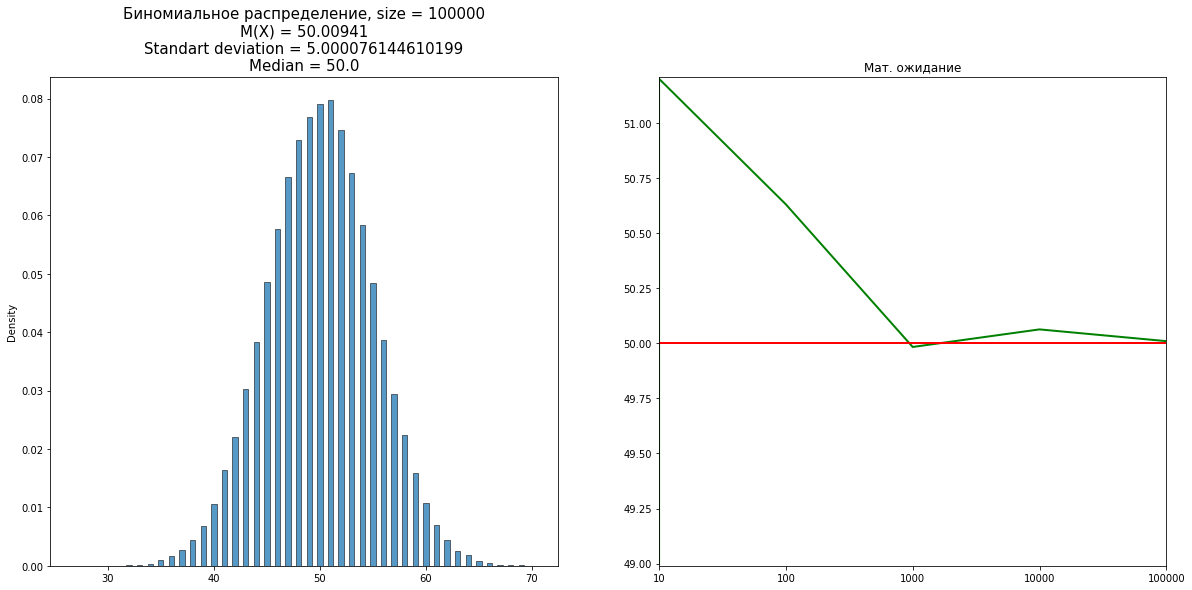

In [18]:
n, p = 100, 0.5
getAnimDiscr(spystats.binom(n, p), "Биномиальное распределение")

## 2) Распределение Бернулли

Распределение Бернулли является частным случаем биномиального распределения, где проводится одно испытание (поэтому n будет равно 1 для такого биномиального распределения).

Распределение применяется для моделирования случайного эксперимента произвольной природы, когда заранее известна вероятность успеха или неудачи.

$$f(x) = \left\{
\begin{matrix}
1 - p, & x = 0 \\
p, & x = 1
\end{matrix}
\right..$$

Принято говорить, что событие $ \{X=1\}$ соответствует «успеху», а событие $ \{X=0\}$ — «неудаче». Эти названия условные, и в зависимости от конкретной задачи могут быть заменены на противоположные.

$0 \leq p \leq 1$ - вероятность появления события в испытании

$ M(X) = p $;

$D(X) = p \cdot (1 - p) = p \cdot q $;

$\sigma(X) = \sqrt{p \cdot q}$.


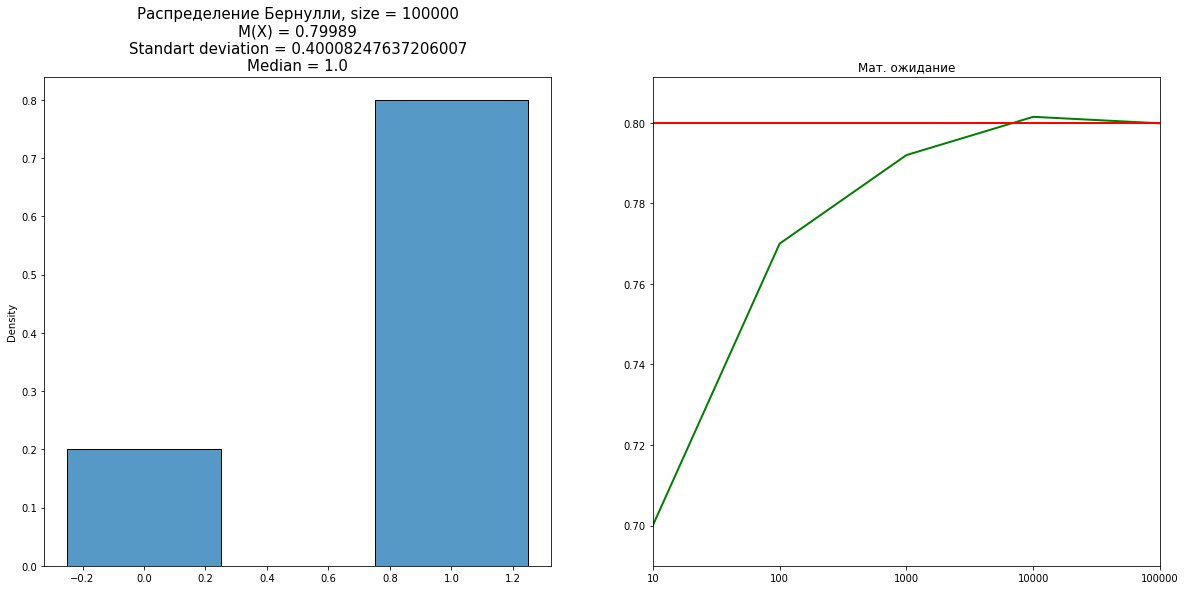

In [19]:
p = 0.8
getAnimDiscr(spystats.bernoulli(p), "Распределение Бернулли")

## 3) Геометрическое распределение
 
Величину X геометрического распределения можно интерпретировать как число испытаний (n) до первого появления успеха в схеме независимых испытаний с вероятностью появления успеха р.
 
$F(x)=q^{n}p$
 
$f(x)=1-q^n$
 
$n \geq 0$ - число "неудач" до первого "успеха"
 
$0 \leq p \leq 1$ - вероятность появления события в испытании
 
$q = 1 - p$ - вероятность не появления события в каждом испытании
 
$ M(X) = \frac {q}{p} $;
 
$D(X) = \frac {q}{p^2}$;
 
$\sigma(X) = \frac {\sqrt{q}}{p}$.

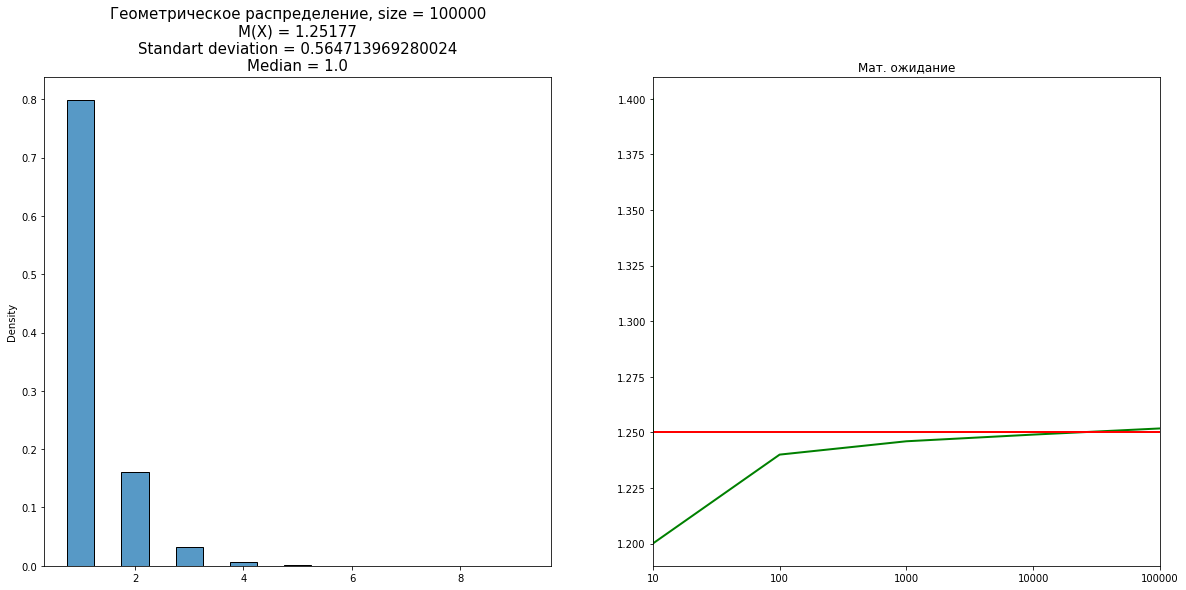

In [20]:
p = 0.8
getAnimDiscr(spystats.geom(p), "Геометрическое распределение")

## 4) Распределение Пуассона
— распределение дискретного типа случайной величины, представляющей собой число событий, произошедших за фиксированное время, при условии, что данные события происходят с некоторой фиксированной средней интенсивностью и независимо друг от друга.

Примеры ситуаций, которые можно смоделировать, применив это распределение: поломки оборудования, длительность исполнения ремонтных работ стабильно работающим сотрудником, ошибка печати, рост колонии бактерий в чашке Петри, дефекты в длинной ленте или цепи, импульсы счётчика радиоактивного излучения, количество забиваемых футбольной командой голов и др.

$f(x) = {\frac {exp(-\mu) \cdot \mu ^{x}}{x!}}, x \ge 0$

$ \mu $ - среднее количество событий за фиксированный промежуток времени

$ M(X) = \mu $;

$D(X) = \mu $;

$\sigma(X) = \sqrt{ \mu }$.

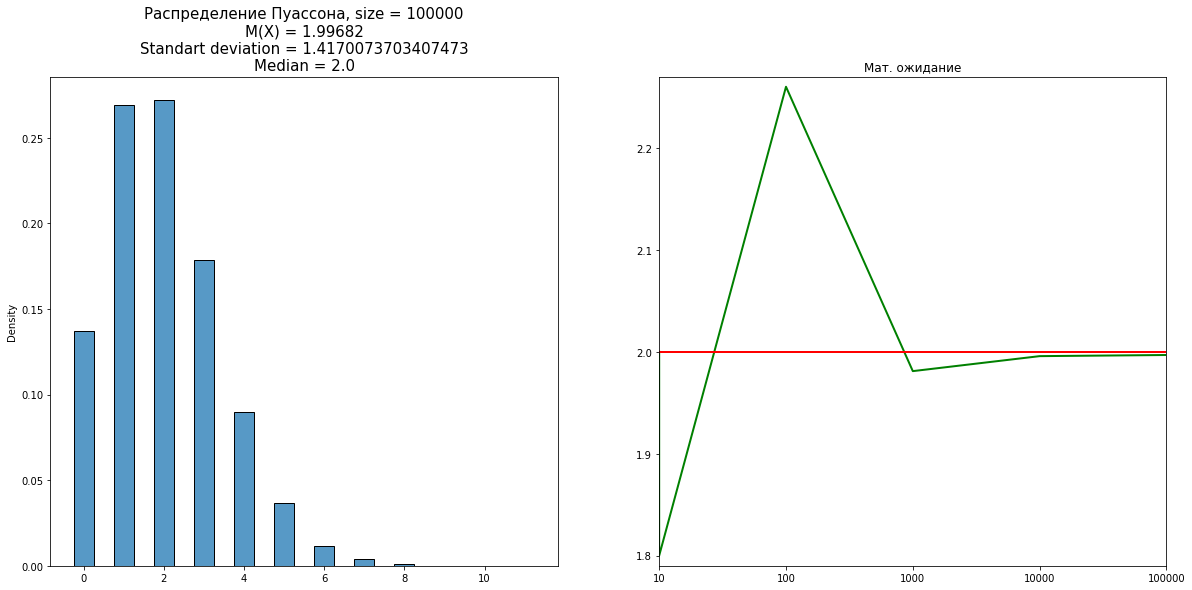

In [21]:
mu = 2
getAnimDiscr(spystats.poisson(mu), "Распределение Пуассона")

## 5) Экспоненциальное распределение
 
Экспоненциальное распределение предсказывает периоды времени между событиями (такими как успех, отказ, доставка и т.д.). Это непрерывное распределение, моделирующее время между двумя последовательными свершениями одного и того же события.
Параметры: $\lambda > 0$,  - среднее число событий за фиксированный промежуток времени = интенсивность (мат. ожидание).
 
Экспоненциальное распределение применяется при моделировании времени ожидания, моделировании отказа, моделировании времени обслуживания.
Если число событий в единицу времени соответствует распределению Пуассона, тогда период времени между событиями соответствует экспоненциальному распределению.
 
$f_{X}(x)={\begin{cases}\lambda \,e^{{-\lambda x}},&x\geq 0,\\0,&x<0.\end{cases}}$
 
$F_{X}(x)=\left\{{\begin{matrix}1-e^{{-\lambda x}}&,\;x\geq 0,\\0&,\;x<0.\end{matrix}}\right.$
 
$M(X) = {\lambda ^{-1}}$
 
$D(X) = {\lambda ^{-2}}$
 
$\sigma(X) = \sqrt{\lambda ^{-2}}$

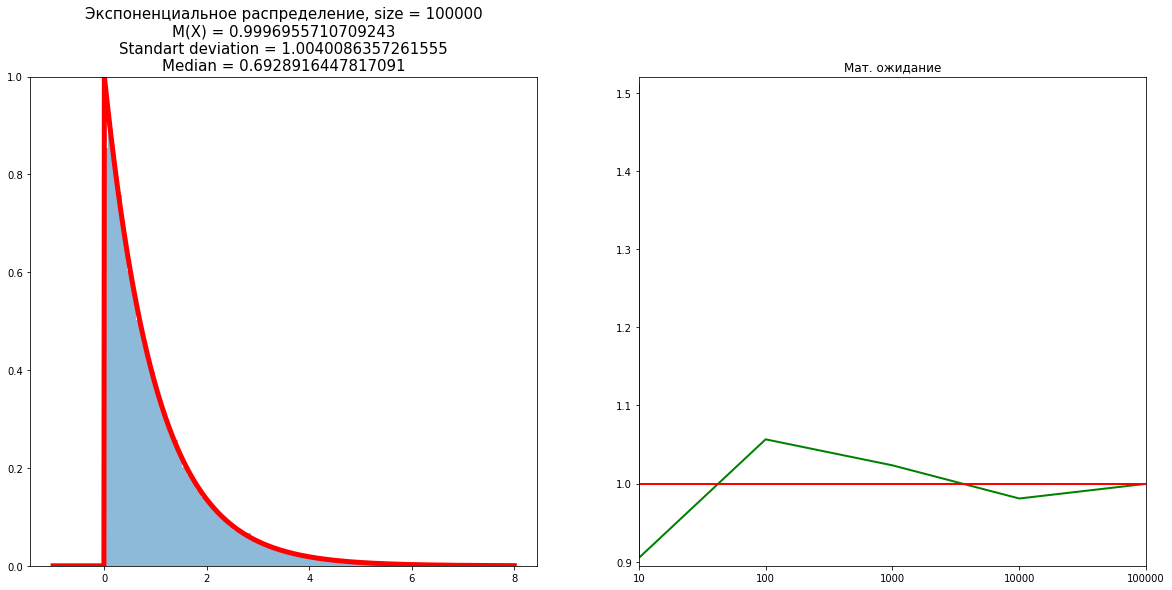

In [22]:
getAnimNepr(spystats.expon(), "Экспоненциальное распределение", (-1, 8), 100)

## 6) Равномерное распределение
— распределение случайной вещественной величины, принимающей значения, принадлежащие некоторому промежутку конечной длины, характеризующееся тем, что плотность вероятности на этом промежутке почти всюду постоянна.

В современной вычислительной технике при моделировании случайных процессов часто приходится пользоваться с.в. X, имеющей равномерное распределение в пределах от 0 до 1.

$$f(x) = \left\{
\begin{matrix}
\frac{1}{b-a}, & x \in [a, b] \\
0, & x \not \in [a, b]
\end{matrix}
\right..$$

Если ${a=0}$ и ${b=1}$, то такое равномерное распределение называют стандартным.

$ M(X) = \frac{a+b}{2} $;

$D(X) = \frac{(b-a)^2}{12} $;

$\sigma(X) = \frac{b-a}{\sqrt{12}}$.

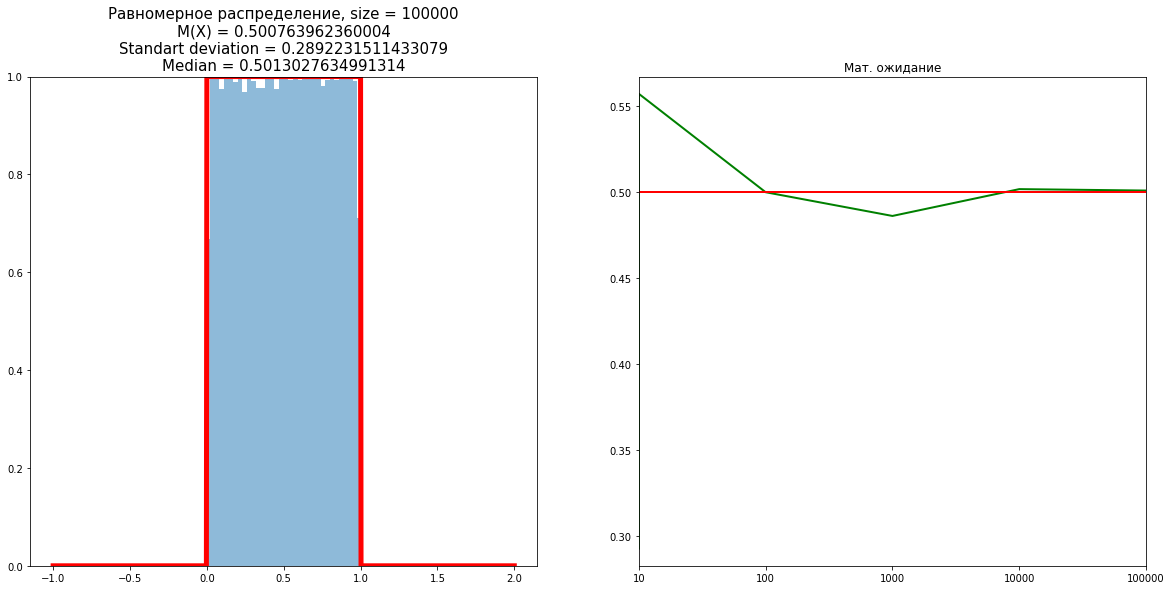

In [23]:
getAnimNepr(spystats.uniform(), "Равномерное распределение", (-1, 2), 100)

## 7) Нормальное распределение
 
Нормальное распределение часто встречается в природе. Например, следующие случайные величины хорошо моделируются нормальным распределением:
 
1. отклонение при стрельбе;
2. погрешности измерений (однако погрешности некоторых измерительных приборов имеют иное распределение);
3. некоторые характеристики живых организмов в популяции.
 
Стандартным нормальным распределением называется нормальное распределение с математическим ожиданием ${\mu =0}$ и стандартным отклонением ${ \sigma =1.}$
 
${ f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$
 
где параметр ${\mu }$  — математическое ожидание (среднее значение), медиана и мода распределения, а параметр ${\sigma }$ — среднеквадратическое отклонение, ${ \sigma ^{2}}$ — дисперсия распределения.
 
Функция распределения:

${ \Phi (x)={\frac {1}{\sqrt {2\pi }}}\int \limits _{-\infty }^{x}e^{-t^{2}/2}\,dt.}$
 
$M(X) = \mu$
 
$D(X) =  {\sigma ^{2}} $
 
$\sigma(X) = \sigma $


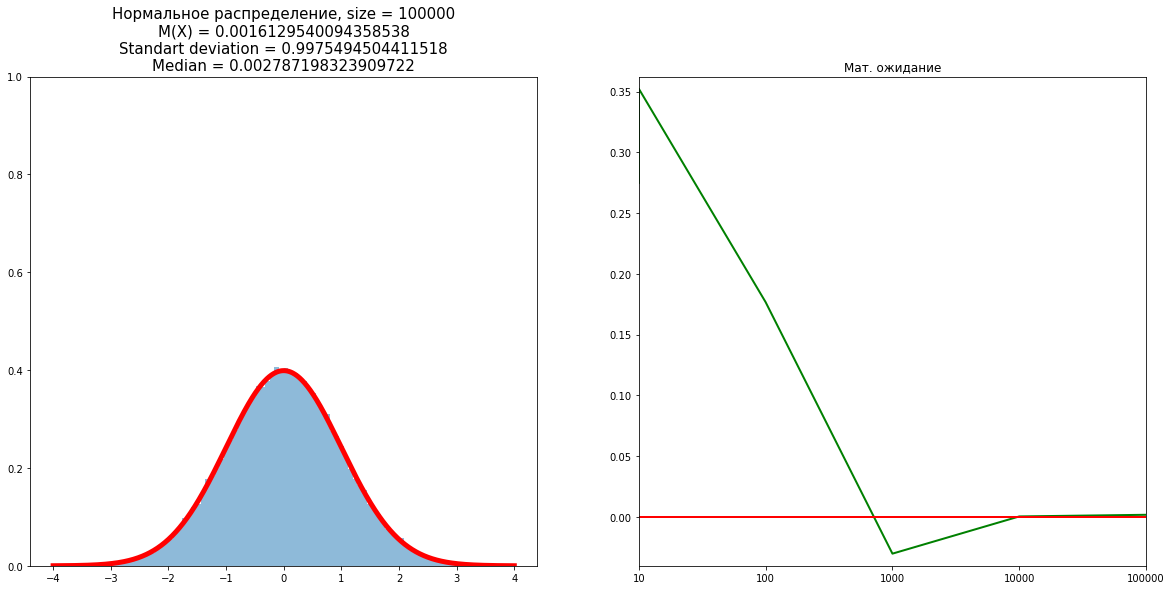

In [24]:
getAnimNepr(spystats.norm(), "Нормальное распределение", (-4, 4), 100)

## 8) Распределение хи-квадрат
— распределение суммы квадратов ${k}$ независимых стандартных нормальных случайных величин.
 
Распределение имеет многочисленные приложения при статистических выводах, например:
1) при использовании критерия хи-квадрат и при оценке дисперсий;
2) в проблеме оценивания среднего нормально распределённой популяции и проблеме оценивания наклона линии регрессии;
3) в дисперсионном анализе.
 
$f(x, k) = {\frac {(1/2)^{k/2}}{\Gamma (k/2)}}x^{k/2-1}e^{-x/2}$
 
где ${\displaystyle \Gamma (z)=\int \limits _{0}^{+\infty }t^{z-1}e^{-t}\,dt,\quad z\in \mathbb {C} ,\quad \mathrm {Re} (z)>0}$ - гамма-функция
 
$ M(X) = k $;
 
$D(X) = 2 \cdot k $;
 
$\sigma(X) = \sqrt{2 \cdot k}$.

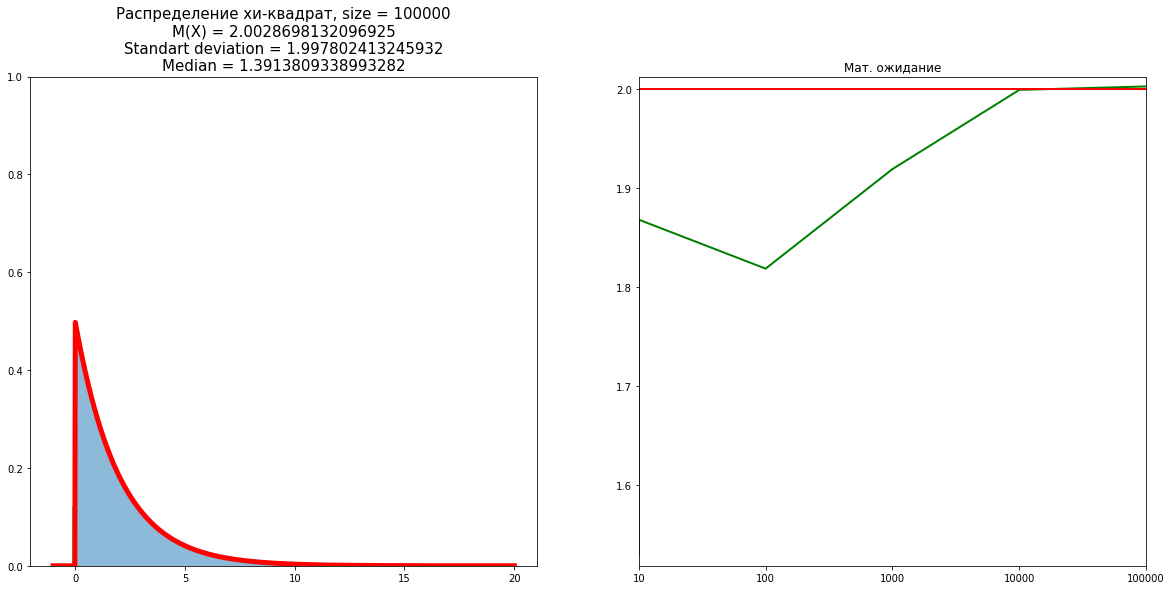

In [25]:
k = 2
getAnimNepr(spystats.chi2(k), "Распределение хи-квадрат", (-1, 20), 100)

## 9) Распределение Стьюдента
 
Распределение Стьюдента играет важную роль в статистическом анализе и используется, например, в t-критерии Стьюдента для оценки статистической значимости разности двух выборочных средних, при построении доверительного интервала для математического ожидания нормальной совокупности при неизвестной дисперсии, а также в линейном регрессионном анализе
 
${\ f_{t}(y)={\frac {\Gamma \left({\frac {n+1}{2}}\right)}{{\sqrt {n\pi }}\,\Gamma \left({\frac {n}{2}}\right)}}\,\left(1+{\frac {y^{2}}{n}}\right)^{-{\frac {n+1}{2}}}}$
 
где ${\displaystyle \Gamma (z)=\int \limits _{0}^{+\infty }t^{z-1}e^{-t}\,dt,\quad z\in \mathbb {C} ,\quad \mathrm {Re} (z)>0}$ - гамма-функция
 
$M(X) = 0, n > 1$
 
$D(X) = 0$
 
$\sigma(X) = {\frac  {n}{n-2}}, n > 2$

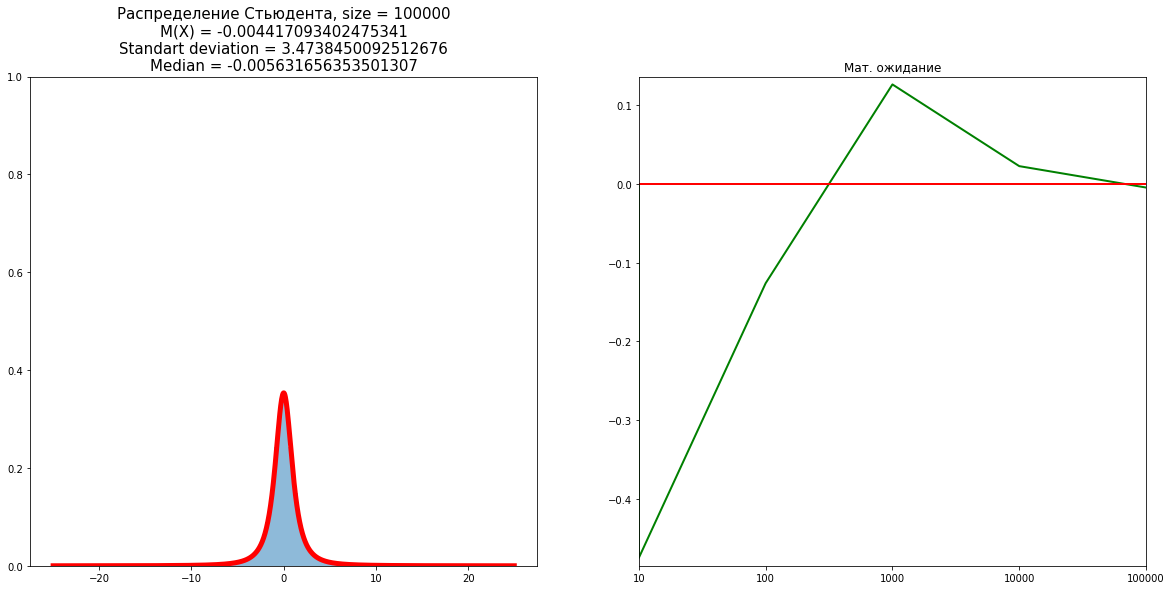

In [26]:
k = 2
getAnimNepr(spystats.t(k), "Распределение Стьюдента", (-25, 25), 100)

## 10) Распределение Фишера
 
На распределении Фишера основан ряд статистических тестов, таких как оценка значимости параметров регрессии, тест на гетероскедастичность и тест на равенство дисперсий нормальных выборок
 
Распределение Фишера определено для действительных неотрицательных аргументов
 
Пусть $Y_{1},Y_{2}$ — две независимые случайные величины, имеющие распределение хи-квадрат: ${\displaystyle Y_{i}\sim \chi ^{2}(d_{i})}$, где $\in {\mathbb  {N}},\;i=1,2$. Тогда распределение случайной величины
 
$F={\frac  {Y_{1}/d_{1}}{Y_{2}/d_{2}}}$ называется распределением Фишера со степенями свободы $d_{1} и d_{2}.$
 
$f(x)={\displaystyle {\frac {\sqrt {\frac {(d_{1}\,x)^{d_{1}}\,\,d_{2}^{d_{2}}}{(d_{1}\,x+d_{2})^{d_{1}+d_{2}}}}}{x\,\mathrm {B} \!\left({\frac {d_{1}}{2}},{\frac {d_{2}}{2}}\right)}}}$

где ${\ \mathrm {B} (x,y)=\int \limits _{0}^{1}t^{x-1}(1-t)^{y-1}\,dt,}$
 
$d_{1}>0,\ d_{2}>0$ - числа степеней свободы
 
$F(x)={\displaystyle I_{\frac {d_{1}x}{d_{1}x+d_{2}}}(d_{1}/2,d_{2}/2)}$
 
$M(x)={\displaystyle {\frac {d_{2}}{d_{2}-2}}}$, если $d_2>2$
 
$D(x)={\displaystyle {\frac {2\,d_{2}^{2}\,(d_{1}+d_{2}-2)}{d_{1}(d_{2}-2)^{2}(d_{2}-4)}},}$ если $d_2>4$

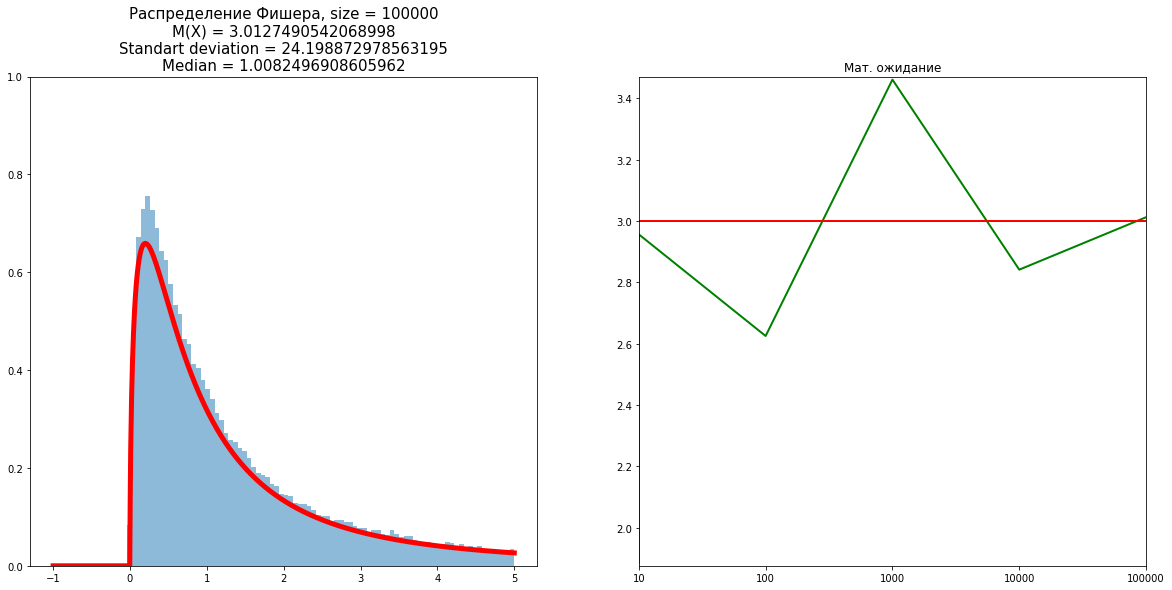

In [27]:
d1, d2 = 3, 3
getAnimNepr(spystats.f(d1, d2), "Распределение Фишера", (-1, 5), 100)

## 11) Распределение Вейбулла
 
Примеры использования распределения Вейбулла:
1. В анализе выживаемости
2. В надёжности и анализе отказов
3. В электротехнике для представления перенапряжения, возникающего в электрических цепях
4. В промышленной инженерии
5. В теории экстремальных значений
6. В прогнозировании погоды (Для описания распределения скорости ветра как распределения, обычно совпадающего с распределением Вейбулла в ветроэнергетике)
 
$$f_X(x) = \left\{
\begin{matrix}
\frac{k}{\lambda} \left(\frac{x}{\lambda}\right)^{k-1} e^{-\left(\frac{x}{\lambda}\right)^k}, & x \ge 0 \\
0, & x < 0
\end{matrix}
\right..$$
 
$F(x;k,\lambda)=1- e^{-(x/\lambda)^k}$
 
$\lambda > 0$ - коэффициент масштаба
 
$k > 0$ - коэффициент формы
 
$M(X) = {\lambda \Gamma \left(1+{\frac {1}{k}}\right)}$
 
$D(X) = {\lambda ^{2}\Gamma \left(1+{\frac {2}{k}}\right)-\mu ^{2}}$
 
$\sigma(X) = \sqrt{D(X)}$

где ${\displaystyle \Gamma (z)=\int \limits _{0}^{+\infty }t^{z-1}e^{-t}\,dt,\quad z\in \mathbb {C} ,\quad \mathrm {Re} (z)>0}$ - гамма-функция

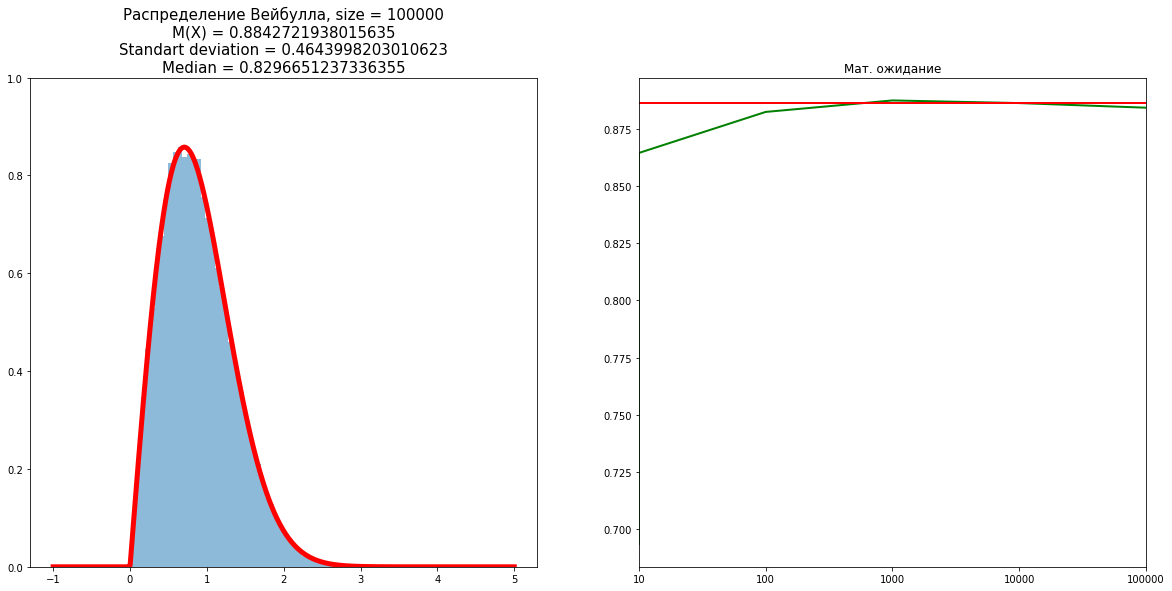

In [28]:
c = 2
getAnimNepr(spystats.weibull_min(c), "Распределение Вейбулла", (-1, 5), 100)

Построим гистограммы для конкатенации всех 11-и распределений и для их поэлементной суммы

SumArray: 
 [54.70687297 56.88507178 67.08775928 ... 61.9478292  69.43537968
 61.25486903]
Shape =  (1000000,)
ConcatArray: 
 [47.         47.         52.         ...  0.95743117  0.53510406
  0.85178091]
Shape =  (11000000,)


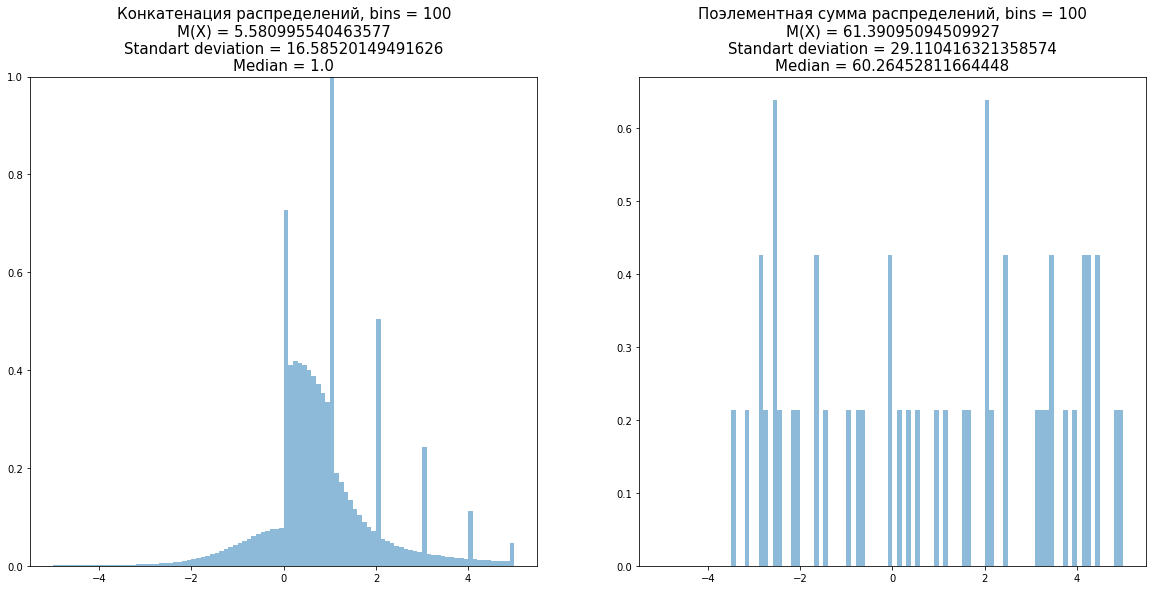

In [29]:
s = 1000000
concatArray = np.array([ spystats.binom(100, 0.5).rvs(size = s), #"Биномиальное распределение")
spystats.bernoulli(0.8).rvs(size = s), #"Распределение Бернулли")
spystats.geom(0.8).rvs(size = s), #"Геометрическое распределение")
spystats.poisson(2).rvs(size = s), #"Распределение Пуассона")
spystats.expon().rvs(size = s), #"Экспоненциальное распределение"
spystats.uniform().rvs(size = s), #"Равномерное распределение"
spystats.norm().rvs(size = s), #"Нормальное распределение"
spystats.chi2(2).rvs(size = s), #"Распределение хи-квадрат"
spystats.t(2).rvs(size = s), #"Распределение Стьюдента"
spystats.f(3, 3).rvs(size = s), #"Распределение Фишера"
spystats.weibull_min(2).rvs(size = s),]) #"Распределение Вейбулла"
sumArray = concatArray.sum(0)
concatArray = np.reshape(concatArray, s * 11)
print("SumArray: \n", sumArray)
print("Shape = ", sumArray.shape)
print("ConcatArray: \n", concatArray)
print("Shape = ", concatArray.shape)

fig = plt.figure(figsize=(20, 9))
ax1 = plt.subplot(1, 2, 1)

ax2 = plt.subplot(1, 2, 2)
ax1.set_ylim(0, 1)
ax1.hist(concatArray, bins=100, density=True, range=(-5, 5), alpha=0.5, label="Гистограмма выборки")
ax2.hist(sumArray, bins=100, density=True, range=(-5, 5), alpha=0.5, label="Гистограмма выборки")
ax1.set_title("{}, bins = {}\nM(X) = {}\nStandart deviation = {}\nMedian = {}".format("Конкатенация распределений", 100,
                                        concatArray.mean(), concatArray.std(), np.median(concatArray)), fontsize=15)
ax2.set_title("{}, bins = {}\nM(X) = {}\nStandart deviation = {}\nMedian = {}".format("Поэлементная сумма распределений", 100,
                                        sumArray.mean(), sumArray.std(), np.median(sumArray)), fontsize=15)
plt.show()

Для расчета ковариации и корреляции возьмем 2 выборки:
1) Экспоненциальное распределение
2) Та же экспоненциальная выборка, но зашумленная выборкой по нормальному распределению (деленная на константу)

Посчитаем ковариационную и корреляционную (по Пирсону и по Спирмену) матрицы для этих вдух выборок:

Матрица ковариации
 [[1.05126145 1.04725162]
 [1.04725162 1.29732669]]
Матрица корреляции по Пирсону
 [[1.        0.8967492]
 [0.8967492 1.       ]]
Корреляция по Спирмену
 SpearmanrResult(correlation=0.7954353823423538, pvalue=0.0)


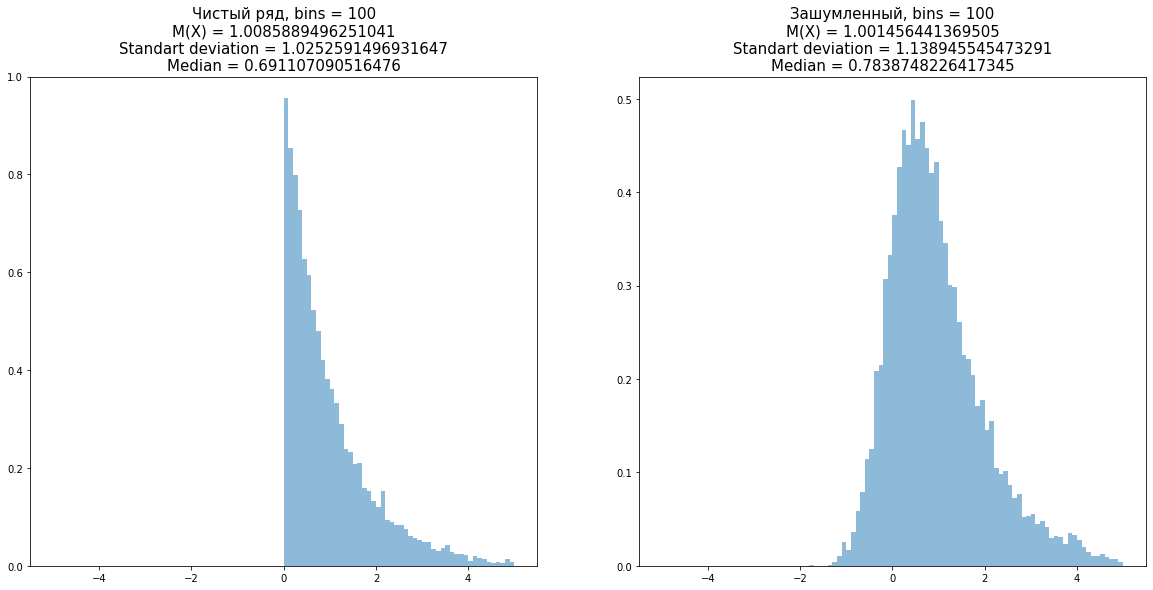

In [30]:
rvs1 = spystats.expon().rvs(size = 10000)
rvs2 = spystats.norm().rvs(size = 10000) / 2
rvs3sum = rvs1 + rvs2

cov = np.cov(rvs1, rvs3sum)

corr = np.corrcoef(rvs1, rvs3sum) # Пирсона
corrSpir = spystats.spearmanr(rvs1, rvs3sum) # Спирмена

print("Матрица ковариации\n", cov)
print("Матрица корреляции по Пирсону\n", corr)
print("Корреляция по Спирмену\n", corrSpir)

fig = plt.figure(figsize=(20, 9))
ax1 = plt.subplot(1, 2, 1)

ax2 = plt.subplot(1, 2, 2)
ax1.set_ylim(0, 1)
ax1.hist(rvs1, bins=100, density=True, range=(-5, 5), alpha=0.5, label="Гистограмма выборки")
ax2.hist(rvs3sum, bins=100, density=True, range=(-5, 5), alpha=0.5, label="Гистограмма выборки")
ax1.set_title("{}, bins = {}\nM(X) = {}\nStandart deviation = {}\nMedian = {}".format("Чистый ряд", 100,
                                        rvs1.mean(), rvs1.std(), np.median(rvs1)), fontsize=15)
ax2.set_title("{}, bins = {}\nM(X) = {}\nStandart deviation = {}\nMedian = {}".format("Зашумленный", 100,
                                        rvs3sum.mean(), rvs3sum.std(), np.median(rvs3sum)), fontsize=15)
plt.show()